## Homework 2: Clustering and Prediction 

In [124]:
# export html file
%%shell
jupyter nbconvert --to html ///content/DSPM_HW2_ichou.ipynb

[NbConvertApp] Converting notebook ///content/DSPM_HW2_ichou.ipynb to html
[NbConvertApp] Writing 4861167 bytes to ///content/DSPM_HW2_ichou.html


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# import data
df = pd.read_csv('analytic_data2022.csv', header =1)
df

statecode  countycode  fipscode state             county  year  \
0             0           0         0    US      United States  2022   
1             1           0      1000    AL            Alabama  2022   
2             1           1      1001    AL     Autauga County  2022   
3             1           3      1003    AL     Baldwin County  2022   
4             1           5      1005    AL     Barbour County  2022   
...         ...         ...       ...   ...                ...   ...   
3189         56          37     56037    WY  Sweetwater County  2022   
3190         56          39     56039    WY       Teton County  2022   
3191         56          41     56041    WY       Uinta County  2022   
3192         56          43     56043    WY    Washakie County  2022   
3193         56          45     56045    WY      Weston County  2022   

      county_ranked  v001_rawvalue  v001_numerator  v001_denominator  ...  \
0               NaN    7281.935564       4125218.0       917267406.0  ...   
1               NaN   10350.071460         88086.0        13668498.0  ...   
2               1.0    8027.394727           836.0          156081.0  ...   
3               1.0    8118.358206          3377.0          614143.0  ...   
4               1.0   12876.760320           539.0           68126.0  ...   
...             ...            ...             ...               ...  ...   
3189            1.0    8419.275418           599.0          122399.0  ...   
3190            1.0    3283.066198           111.0           66036.0  ...   
3191            1.0    9358.208153           287.0           57690.0  ...   
3192            1.0    7073.941804           115.0           21075.0  ...   
3193            1.0    5149.435226            75.0           18783.0  ...   

      v057_rawvalue  v057_numerator  v057_denominator  v057_cilow  \
0          0.507545       167227921         329484123         NaN   
1          0.517027         2544566           4921532         NaN   
2          0.515077           28919             56145         NaN   
3          0.515891          118287            229287         NaN   
4          0.471837           11602             24589         NaN   
...             ...             ...               ...         ...   
3189       0.483608           20637             42673         NaN   
3190       0.481338           11310             23497         NaN   
3191       0.493940            9985             20215         NaN   
3192       0.490464            3806              7760         NaN   
3193       0.475308            3205              6743         NaN   

      v057_cihigh  v058_rawvalue  v058_numerator  v058_denominator  \
0             NaN       0.192690             NaN               NaN   
1             NaN       0.409632       1957932.0         4779736.0   
2             NaN       0.420022         22921.0           54571.0   
3             NaN       0.422791         77060.0          182265.0   
4             NaN       0.677896         18613.0           27457.0   
...           ...            ...             ...               ...   
3189          NaN       0.109163          4782.0           43806.0   
3190          NaN       0.464309          9887.0           21294.0   
3191          NaN       0.430959          9101.0           21118.0   
3192          NaN       0.359545          3068.0            8533.0   
3193          NaN       0.545366          3931.0            7208.0   

      v058_cilow  v058_cihigh  
0            NaN          NaN  
1            NaN          NaN  
2            NaN          NaN  
3            NaN          NaN  
4            NaN          NaN  
...          ...          ...  
3189         NaN          NaN  
3190         NaN          NaN  
3191         NaN          NaN  
3192         NaN          NaN  
3193         NaN          NaN  

[3194 rows x 725 columns]

#### 1)  What steps did you use for exploratory data analysis and subsequent data preparation on this data set?   
#### This should address summary statistics and handling of missing data and outliers (5 points) 


1) Answer:  
a. Exploratory data analysis and data preparation:  


In [96]:
#Step 1. Clean Up data

#keep the columns needed for analysis and delete all the others, that is 'rawvalue' of the "Ranked Measures"
#1a.keep county information and raw data only
for col in df.columns:
     if col.startswith('v'):
       if 'raw' not in col:
         df = df.drop([f'{col}'], axis=1)  # delete columns that are not raw data

#1b.drop "Additional Measures", drop all data start from column 'v173_rawvalue'
index_additional = df.columns.get_loc('v173_rawvalue')
df = df.drop(df.iloc[:, index_additional:],axis = 1)

#1c.drop 'year' column, all data is 2022
df = df.drop('year',axis = 1)

#1d.drop state level data, row with missing value in column "country ranked"
df = df.dropna(subset=['county_ranked'])
for col in df.columns:
  print(col)

statecode
countycode
fipscode
state
county
county_ranked
v001_rawvalue
v002_rawvalue
v036_rawvalue
v042_rawvalue
v037_rawvalue
v009_rawvalue
v011_rawvalue
v133_rawvalue
v070_rawvalue
v132_rawvalue
v049_rawvalue
v134_rawvalue
v045_rawvalue
v014_rawvalue
v085_rawvalue
v004_rawvalue
v088_rawvalue
v062_rawvalue
v005_rawvalue
v050_rawvalue
v155_rawvalue
v168_rawvalue
v069_rawvalue
v023_rawvalue
v024_rawvalue
v044_rawvalue
v082_rawvalue
v140_rawvalue
v043_rawvalue
v135_rawvalue
v125_rawvalue
v124_rawvalue
v136_rawvalue
v067_rawvalue
v137_rawvalue


In [97]:
#Step2. Data Exploration with Statistics
df.describe().transpose()

count          mean           std          min           25%  \
statecode      3142.0     30.280076     15.144339     1.000000     18.000000   
countycode     3142.0    103.572884    107.704060     1.000000     35.000000   
fipscode       3142.0  30383.649268  15162.508374  1001.000000  18177.500000   
county_ranked  3142.0      0.980904      0.136885     0.000000      1.000000   
v001_rawvalue  3082.0   8912.663226   2943.548055  3090.426825   6877.090136   
v002_rawvalue  3142.0      0.206237      0.050252     0.089000      0.167000   
v036_rawvalue  3142.0      4.341863      0.751352     2.501610      3.758262   
v042_rawvalue  3142.0      4.889309      0.690912     3.235874      4.402157   
v037_rawvalue  3036.0      0.082145      0.020406     0.028871      0.068226   
v009_rawvalue  3142.0      0.203673      0.041959     0.065000      0.175000   
v011_rawvalue  3142.0      0.357258      0.043082     0.164000      0.333000   
v133_rawvalue  3109.0      7.446607      1.145940     0.000000      6.800000   
v070_rawvalue  3142.0      0.303586      0.058237     0.129000      0.266000   
v132_rawvalue  3066.0      0.551458      0.238337     0.000000      0.394976   
v049_rawvalue  3142.0      0.190707      0.033550     0.067417      0.166460   
v134_rawvalue  3115.0      0.274854      0.151515     0.000000      0.183333   
v045_rawvalue  3024.0    417.857639    292.725642     0.000000    231.175000   
v014_rawvalue  2953.0     26.155571     12.749304     1.796157     16.794292   
v085_rawvalue  3141.0      0.119444      0.051196     0.023549      0.080244   
v004_rawvalue  2989.0      0.000545      0.000366     0.000000      0.000308   
v088_rawvalue  3052.0      0.000474      0.000332     0.000000      0.000270   
v062_rawvalue  2938.0      0.001811      0.002017     0.000000      0.000547   
v005_rawvalue  3089.0   4043.923600   1550.307607   379.000000   2980.000000   
v050_rawvalue  3122.0      0.419769      0.079254     0.030000      0.370000   
v155_rawvalue  3123.0      0.429270      0.100689     0.040000      0.370000   
v168_rawvalue  3142.0      0.876018      0.060395     0.218519      0.841423   
v069_rawvalue  3142.0      0.587679      0.118936     0.011111      0.506114   
v023_rawvalue  3141.0      0.067434      0.022843     0.016949      0.052154   
v024_rawvalue  3141.0      0.186888      0.081956     0.026000      0.126000   
v044_rawvalue  3136.0      4.506319      0.817306     1.045052      3.971287   
v082_rawvalue  3141.0      0.241666      0.101096     0.000000      0.176744   
v140_rawvalue  3142.0     11.453747      5.905677     0.000000      7.971833   
v043_rawvalue  2951.0    251.909300    192.512209     0.000000    117.635602   
v135_rawvalue  3037.0     92.071261     27.002128    19.930828     74.014680   
v125_rawvalue  3115.0      8.018299      1.654089     2.500000      6.900000   
v124_rawvalue  3099.0      0.344305      0.475218     0.000000      0.000000   
v136_rawvalue  3142.0      0.133670      0.044100     0.000000      0.107405   
v067_rawvalue  3141.0      0.791946      0.076163     0.048769      0.769171   
v137_rawvalue  3142.0      0.323764      0.127513     0.000000      0.227000   

                        50%           75%           max  
statecode         29.000000     45.000000     56.000000  
countycode        79.000000    133.000000    840.000000  
fipscode       29176.000000  45080.500000  56045.000000  
county_ranked      1.000000      1.000000      1.000000  
v001_rawvalue   8561.196561  10517.936060  30007.870280  
v002_rawvalue      0.201000      0.241750      0.448000  
v036_rawvalue      4.313219      4.833262      7.795640  
v042_rawvalue      4.852105      5.390067      7.460286  
v037_rawvalue      0.079506      0.091536      0.216981  
v009_rawvalue      0.200000      0.232000      0.430000  
v011_rawvalue      0.362000      0.384000      0.510000  
v133_rawvalue      7.600000      8.200000     10.000000  
v070_rawvalue      0.300000      0.343000      0.518000  
v13

From the dataframe description, we know there are some outliners(extreme large or small value), missing data, and also different scales of features. So, we need to operate data preprocessing as following methods:   
1.Remove Outlier  
2.Process Missing Data  
3.Normalization

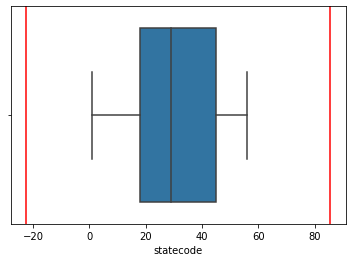

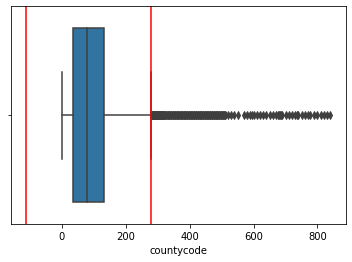

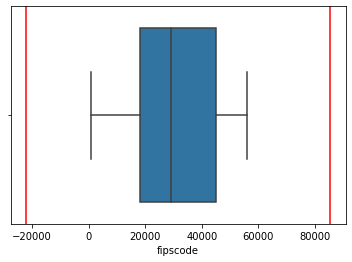

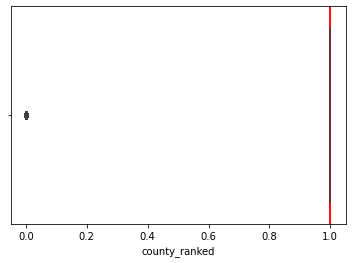

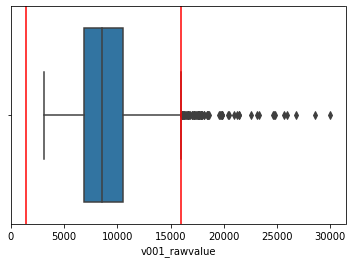

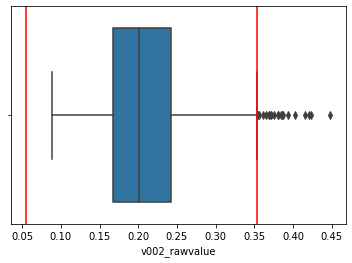

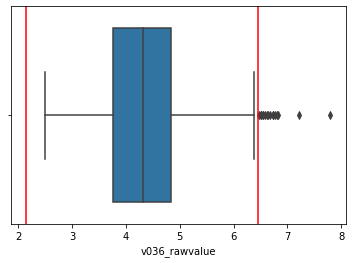

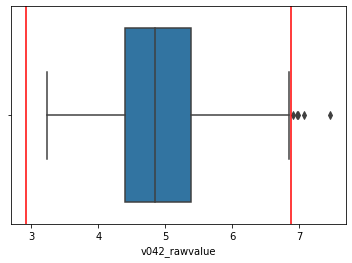

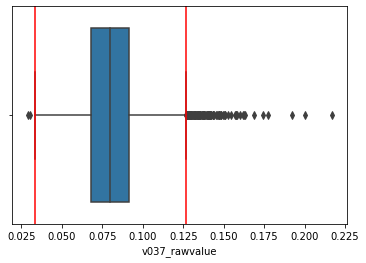

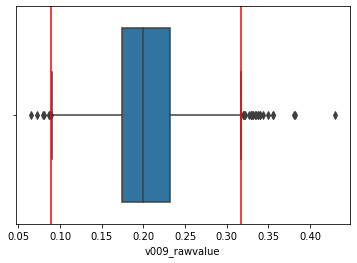

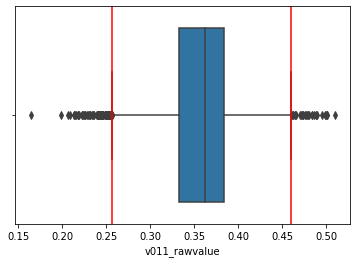

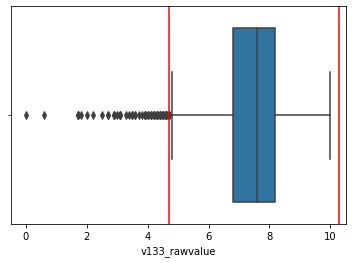

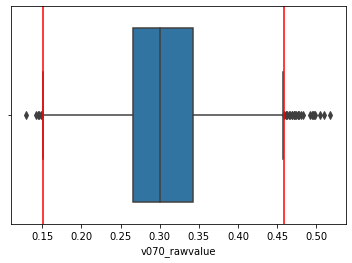

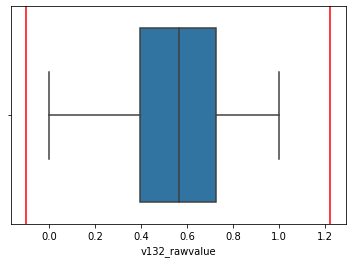

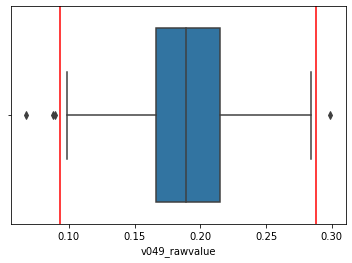

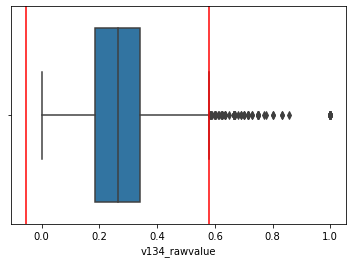

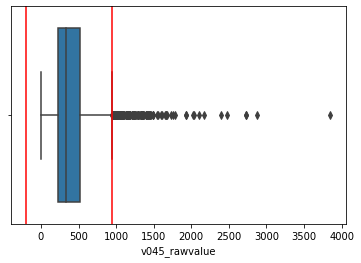

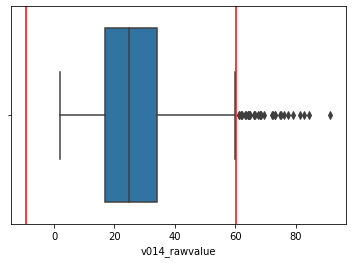

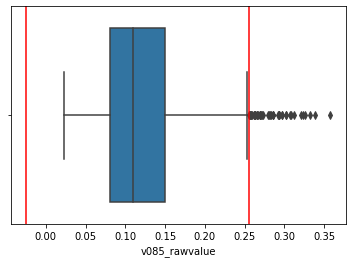

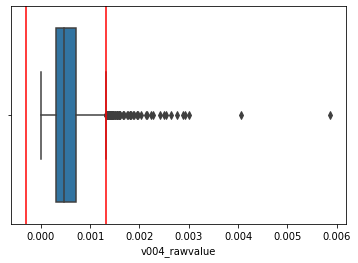

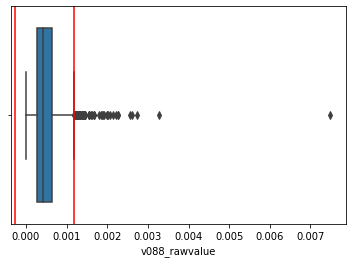

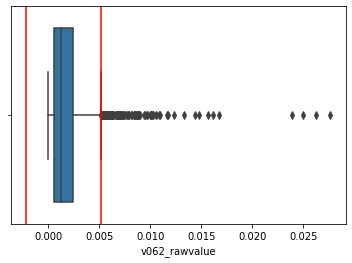

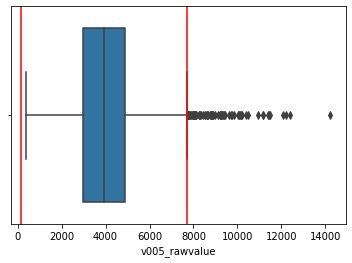

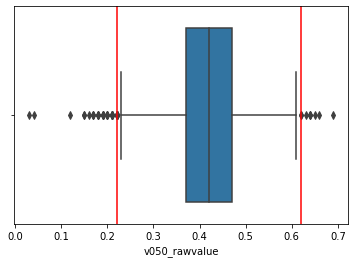

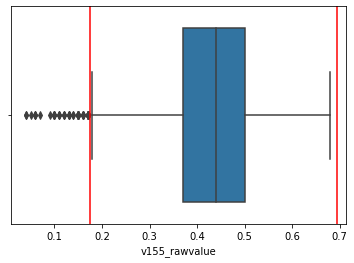

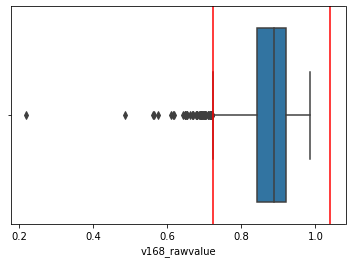

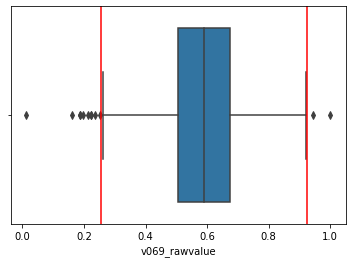

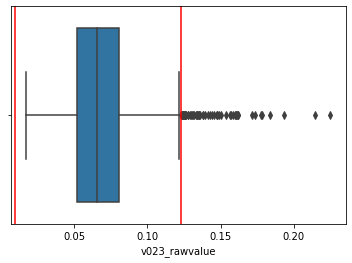

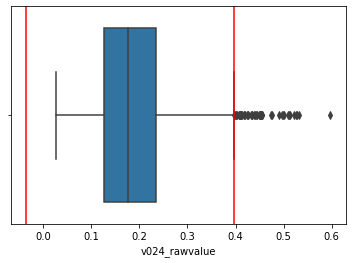

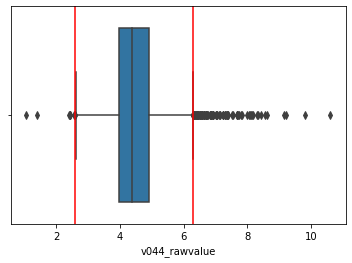

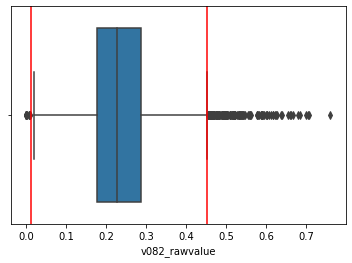

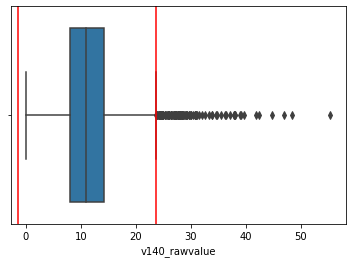

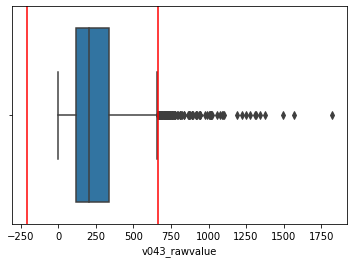

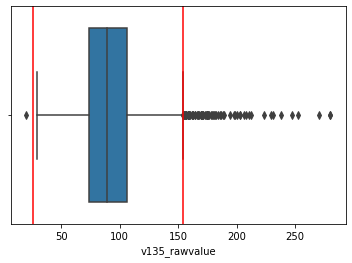

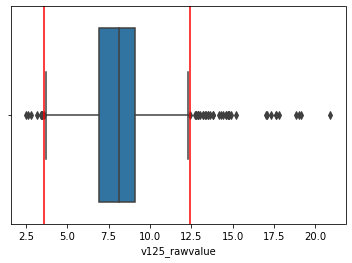

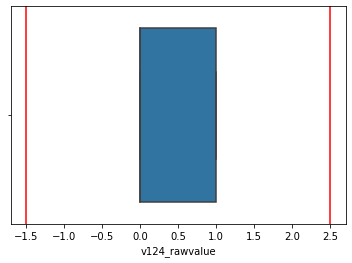

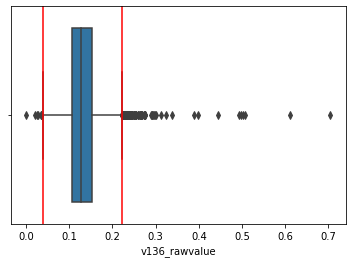

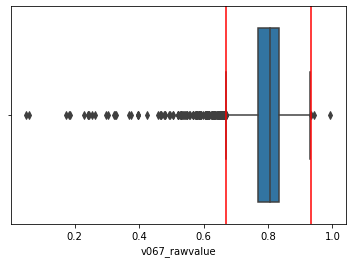

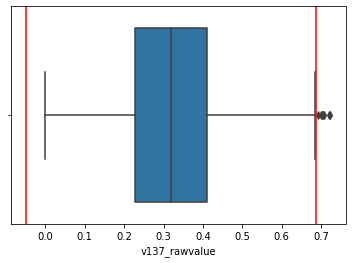

In [98]:
#Step3a. check outliers(not include the code adn ranked column)
cols = list(df.columns)
for element in ['state','county']:
  cols.remove(element)
for col in cols:
  sns.boxplot(x = df[f'{col}'])
  #outliner: out of 1.5 IQR range from 1st and 3rd quantile
  q1 = df[f'{col}'].quantile(0.25)
  q3 = df[f'{col}'].quantile(0.75)
  iqr = q3-q1 #Interquartile range
  lowbar  = q1-1.5*iqr
  highbar = q3+1.5*iqr
  plt.axvline(lowbar, color='red')
  plt.axvline(highbar, color='red')
  plt.show()

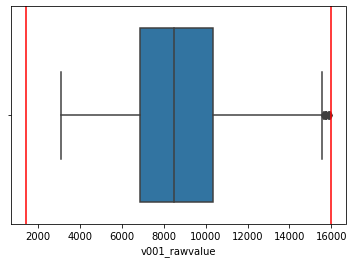

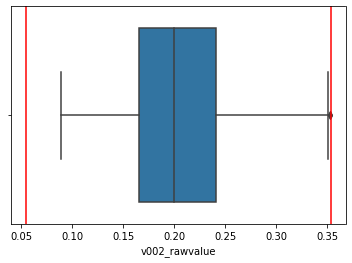

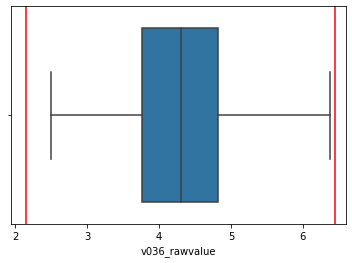

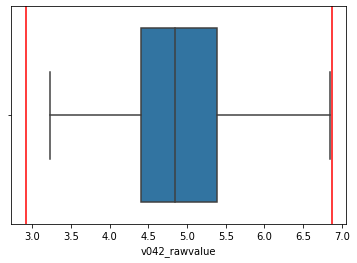

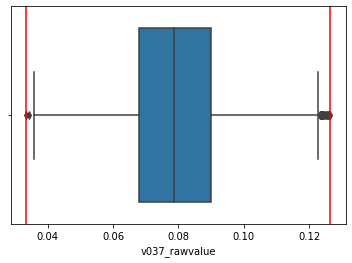

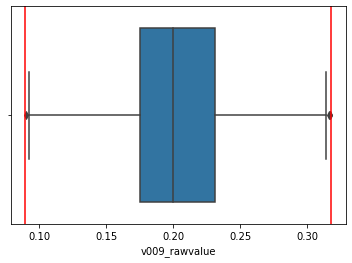

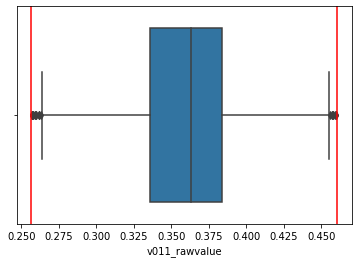

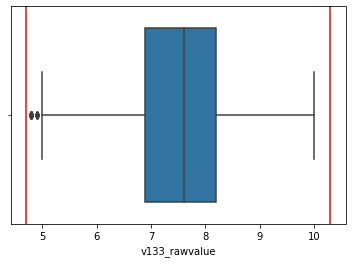

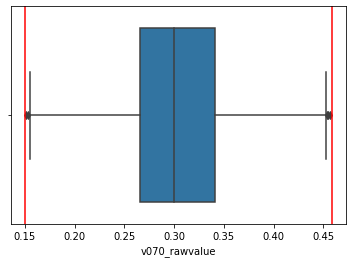

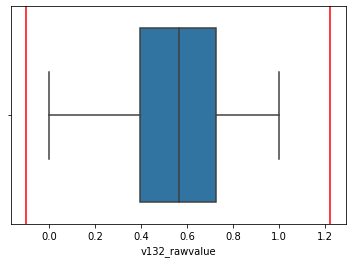

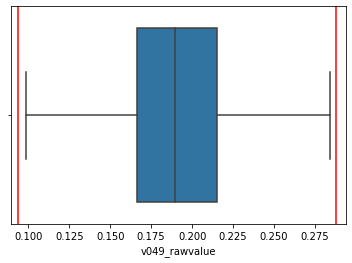

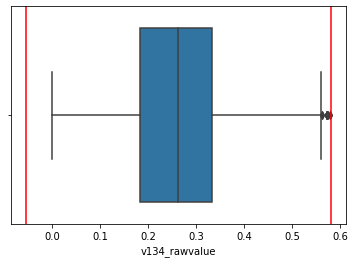

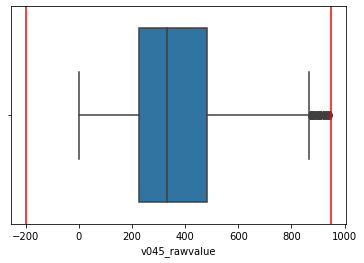

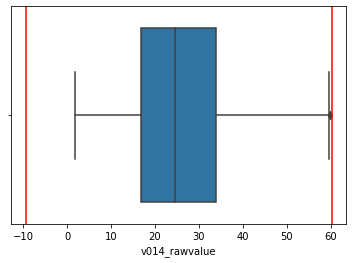

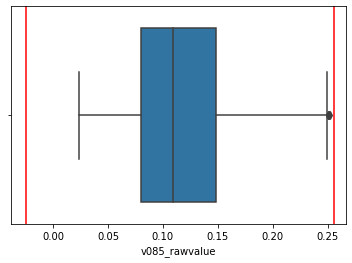

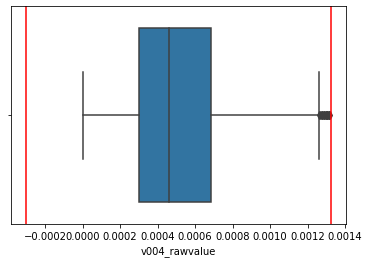

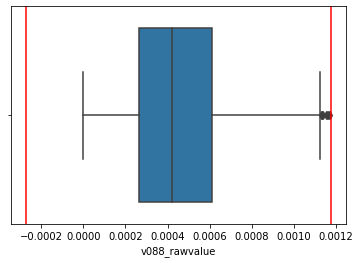

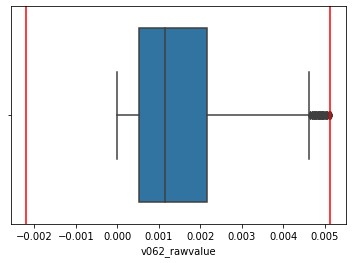

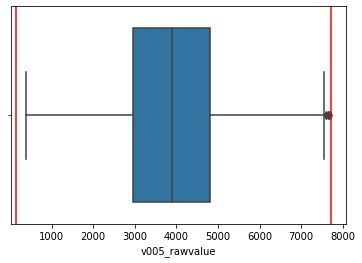

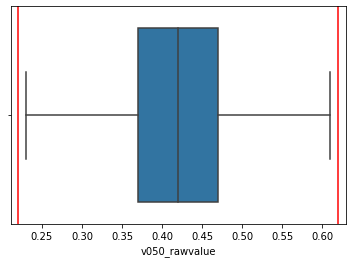

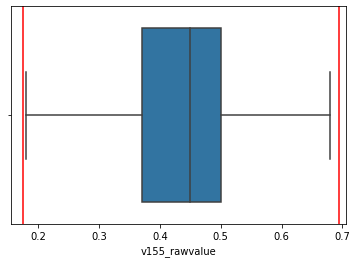

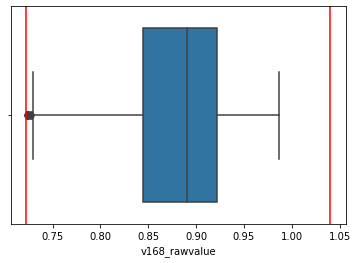

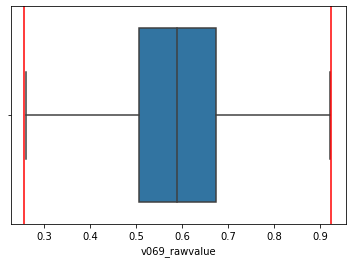

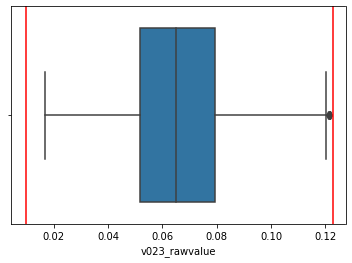

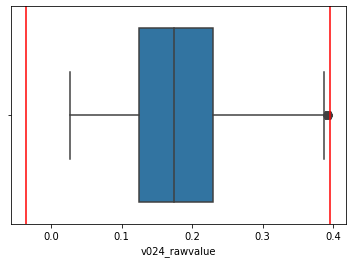

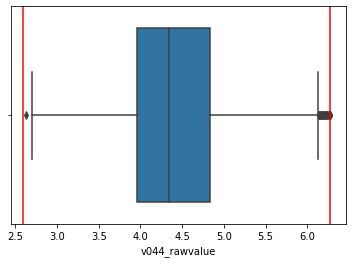

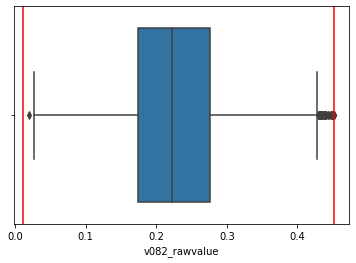

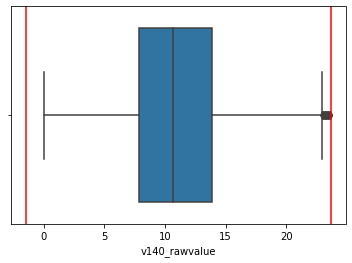

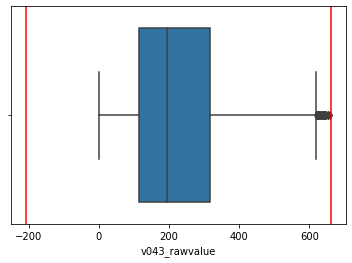

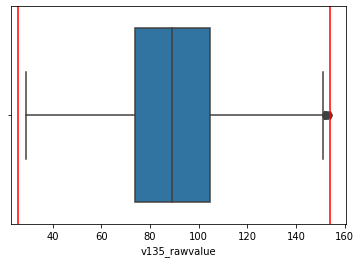

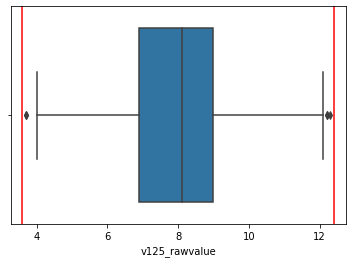

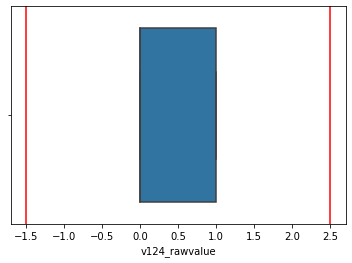

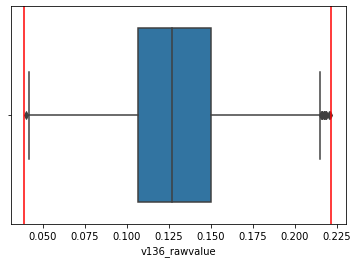

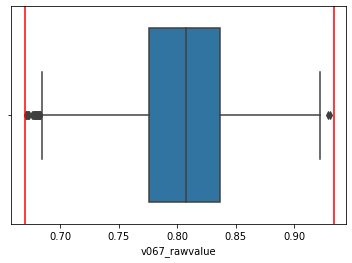

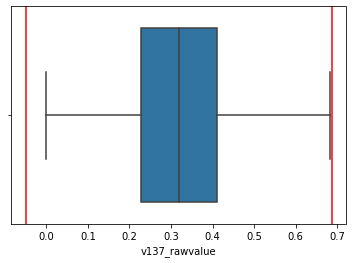

In [99]:
#Step3b. Remove outliers (not include the code adn ranked column)
df_rm = df.copy()
for col in cols:
  if col != 'statecode' and col != 'countycode' and col != 'fipscode'and col != 'county_ranked':
    #outliner: out of 1.5 IQR range from 1st and 3rd quantile
    q1 = df[f'{col}'].quantile(0.25)
    q3 = df[f'{col}'].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lowbar  = q1-1.5*iqr
    highbar = q3+1.5*iqr
    #create new dataframe df_outlier without outlier
    outlier_id =  ( df.loc[(df[f'{col}'] < lowbar) | (df[f'{col}'] > highbar)] ).index
    df_rm.loc[outlier_id, col] = np.NaN #fillin number
    #plot result
    sns.boxplot(x = df_rm[f'{col}'])
    plt.axvline(lowbar, color='red')
    plt.axvline(highbar, color='red')
    plt.show()  

In [100]:
#Step4a.check missing data
df_rm.isnull().sum()

statecode          0
countycode         0
fipscode           0
state              0
county             0
county_ranked      0
v001_rawvalue    129
v002_rawvalue     20
v036_rawvalue     17
v042_rawvalue      5
v037_rawvalue    218
v009_rawvalue     30
v011_rawvalue    107
v133_rawvalue    116
v070_rawvalue     30
v132_rawvalue     76
v049_rawvalue      4
v134_rawvalue    131
v045_rawvalue    263
v014_rawvalue    223
v085_rawvalue     48
v004_rawvalue    242
v088_rawvalue    162
v062_rawvalue    355
v005_rawvalue    126
v050_rawvalue     67
v155_rawvalue     74
v168_rawvalue     60
v069_rawvalue     12
v023_rawvalue     61
v024_rawvalue     52
v044_rawvalue    119
v082_rawvalue    158
v140_rawvalue    114
v043_rawvalue    303
v135_rawvalue    180
v125_rawvalue     76
v124_rawvalue     43
v136_rawvalue    107
v067_rawvalue    157
v137_rawvalue      7
dtype: int64

In [101]:
#Step4b. Process Missing Data
# Strategy: 1.Drop the missing data(row) if the missing factors below to health outcome
#           since outcome is important for building predict model
#           2.Other columns use median to replace missing data 
#           to avoid leading to invalid conclusions by using mean value to replace missing
#           data in asymmetric distribution data sets.
#process null data
df_nonull = df_rm.copy()
# Filter out the features in the group of "health outcomes" 
outcomes = ['v001_rawvalue','v002_rawvalue','v036_rawvalue','v042_rawvalue','v037_rawvalue']

for col in df_nonull.columns:
  if df_rm[col].isnull().sum() !=0:
    if col in outcomes:
      df_nonull.dropna(subset = [col], inplace = True)
    else:
      median = df_nonull[col].median()
      df_nonull[col].fillna(median, inplace = True)

df_nonull.isnull().sum()

statecode        0
countycode       0
fipscode         0
state            0
county           0
county_ranked    0
v001_rawvalue    0
v002_rawvalue    0
v036_rawvalue    0
v042_rawvalue    0
v037_rawvalue    0
v009_rawvalue    0
v011_rawvalue    0
v133_rawvalue    0
v070_rawvalue    0
v132_rawvalue    0
v049_rawvalue    0
v134_rawvalue    0
v045_rawvalue    0
v014_rawvalue    0
v085_rawvalue    0
v004_rawvalue    0
v088_rawvalue    0
v062_rawvalue    0
v005_rawvalue    0
v050_rawvalue    0
v155_rawvalue    0
v168_rawvalue    0
v069_rawvalue    0
v023_rawvalue    0
v024_rawvalue    0
v044_rawvalue    0
v082_rawvalue    0
v140_rawvalue    0
v043_rawvalue    0
v135_rawvalue    0
v125_rawvalue    0
v124_rawvalue    0
v136_rawvalue    0
v067_rawvalue    0
v137_rawvalue    0
dtype: int64

In [102]:
df_nonull.describe().transpose()

count          mean           std          min           25%  \
statecode      2849.0     30.584767     15.058218     1.000000     19.000000   
countycode     2849.0    101.973675    104.489447     1.000000     35.000000   
fipscode       2849.0  30686.740260  15074.681984  1001.000000  19013.000000   
county_ranked  2849.0      1.000000      0.000000     1.000000      1.000000   
v001_rawvalue  2849.0   8546.672995   2368.852732  3090.426825   6810.266251   
v002_rawvalue  2849.0      0.202204      0.045203     0.089000      0.167000   
v036_rawvalue  2849.0      4.297218      0.702341     2.501610      3.749103   
v042_rawvalue  2849.0      4.867682      0.665909     3.235874      4.396259   
v037_rawvalue  2849.0      0.079627      0.016728     0.033333      0.067839   
v009_rawvalue  2849.0      0.201739      0.039289     0.090000      0.175000   
v011_rawvalue  2849.0      0.357097      0.035079     0.257000      0.336000   
v133_rawvalue  2849.0      7.619445      0.915431     4.800000      7.000000   
v070_rawvalue  2849.0      0.299516      0.052985     0.151000      0.265000   
v132_rawvalue  2849.0      0.565314      0.227518     0.000000      0.415696   
v049_rawvalue  2849.0      0.192236      0.032070     0.098539      0.168890   
v134_rawvalue  2849.0      0.260761      0.116491     0.000000      0.187500   
v045_rawvalue  2849.0    368.097613    185.932623     0.000000    232.600000   
v014_rawvalue  2849.0     24.788682     11.212326     1.796157     16.522241   
v085_rawvalue  2849.0      0.114697      0.046969     0.023549      0.078149   
v004_rawvalue  2849.0      0.000519      0.000265     0.000000      0.000331   
v088_rawvalue  2849.0      0.000460      0.000237     0.000000      0.000294   
v062_rawvalue  2849.0      0.001483      0.001125     0.000032      0.000626   
v005_rawvalue  2849.0   3888.693226   1267.181315   379.000000   2981.000000   
v050_rawvalue  2849.0      0.425209      0.072369     0.230000      0.380000   
v155_rawvalue  2849.0      0.441299      0.089900     0.180000      0.380000   
v168_rawvalue  2849.0      0.881976      0.050362     0.722688      0.850302   
v069_rawvalue  2849.0      0.592377      0.112807     0.260952      0.512697   
v023_rawvalue  2849.0      0.066037      0.019176     0.017146      0.052677   
v024_rawvalue  2849.0      0.176223      0.069733     0.026000      0.124000   
v044_rawvalue  2849.0      4.401108      0.611707     2.701773      3.970238   
v082_rawvalue  2849.0      0.227479      0.073437     0.027894      0.177348   
v140_rawvalue  2849.0     11.077247      4.316389     0.000000      8.266107   
v043_rawvalue  2849.0    226.676556    139.058992     0.000000    124.069479   
v135_rawvalue  2849.0     88.924775     21.943707    28.995411     73.296215   
v125_rawvalue  2849.0      8.007125      1.374283     3.700000      7.000000   
v124_rawvalue  2849.0      0.347841      0.476369     0.000000      0.000000   
v136_rawvalue  2849.0      0.128807      0.031738     0.042000      0.107754   
v067_rawvalue  2849.0      0.804037      0.045132     0.670933      0.778352   
v137_rawvalue  2849.0      0.325665      0.124599     0.000000      0.232000   

                        50%           75%           max  
statecode         29.000000     46.000000     56.000000  
countycode        79.000000    133.000000    840.000000  
fipscode       29189.000000  46015.000000  56045.000000  
county_ranked      1.000000      1.000000      1.000000  
v001_rawvalue   8365.952034  10157.416490  15910.898790  
v002_rawvalue      0.199000      0.235000      0.353000  
v036_rawvalue      4.291151      4.764922      6.378807  
v042_rawvalue      4.837637      5.336474      6.849864  
v037_rawvalue      0.078178      0.089440      0.126193  
v009_rawvalue      0.199000      0.230000      0.317000  
v011_rawvalue      0.361000      0.381000      0.459000  
v133_rawvalue      7.700000      8.300000     10.000000  
v070_rawvalue      0.298000      0.338000      0.446000  
v13

In [103]:
#check if there's any duplicated data
df_nonull.duplicated().sum()

0

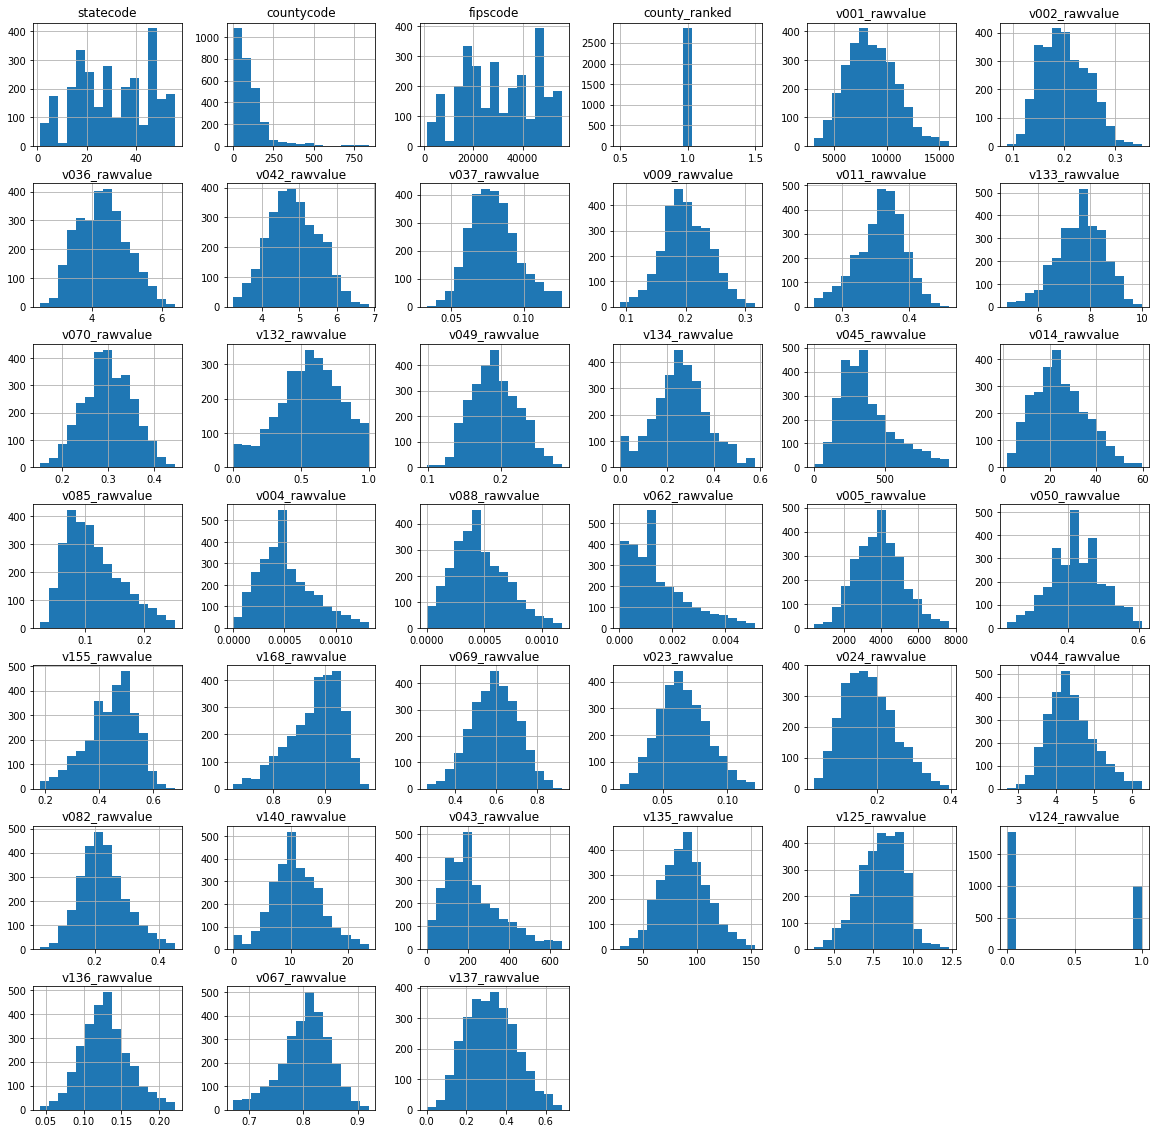

In [104]:
#Step 5.Visulization
#5a.histograms
df_nonull.hist(figsize=(20, 20), bins = 15) 
plt.show()

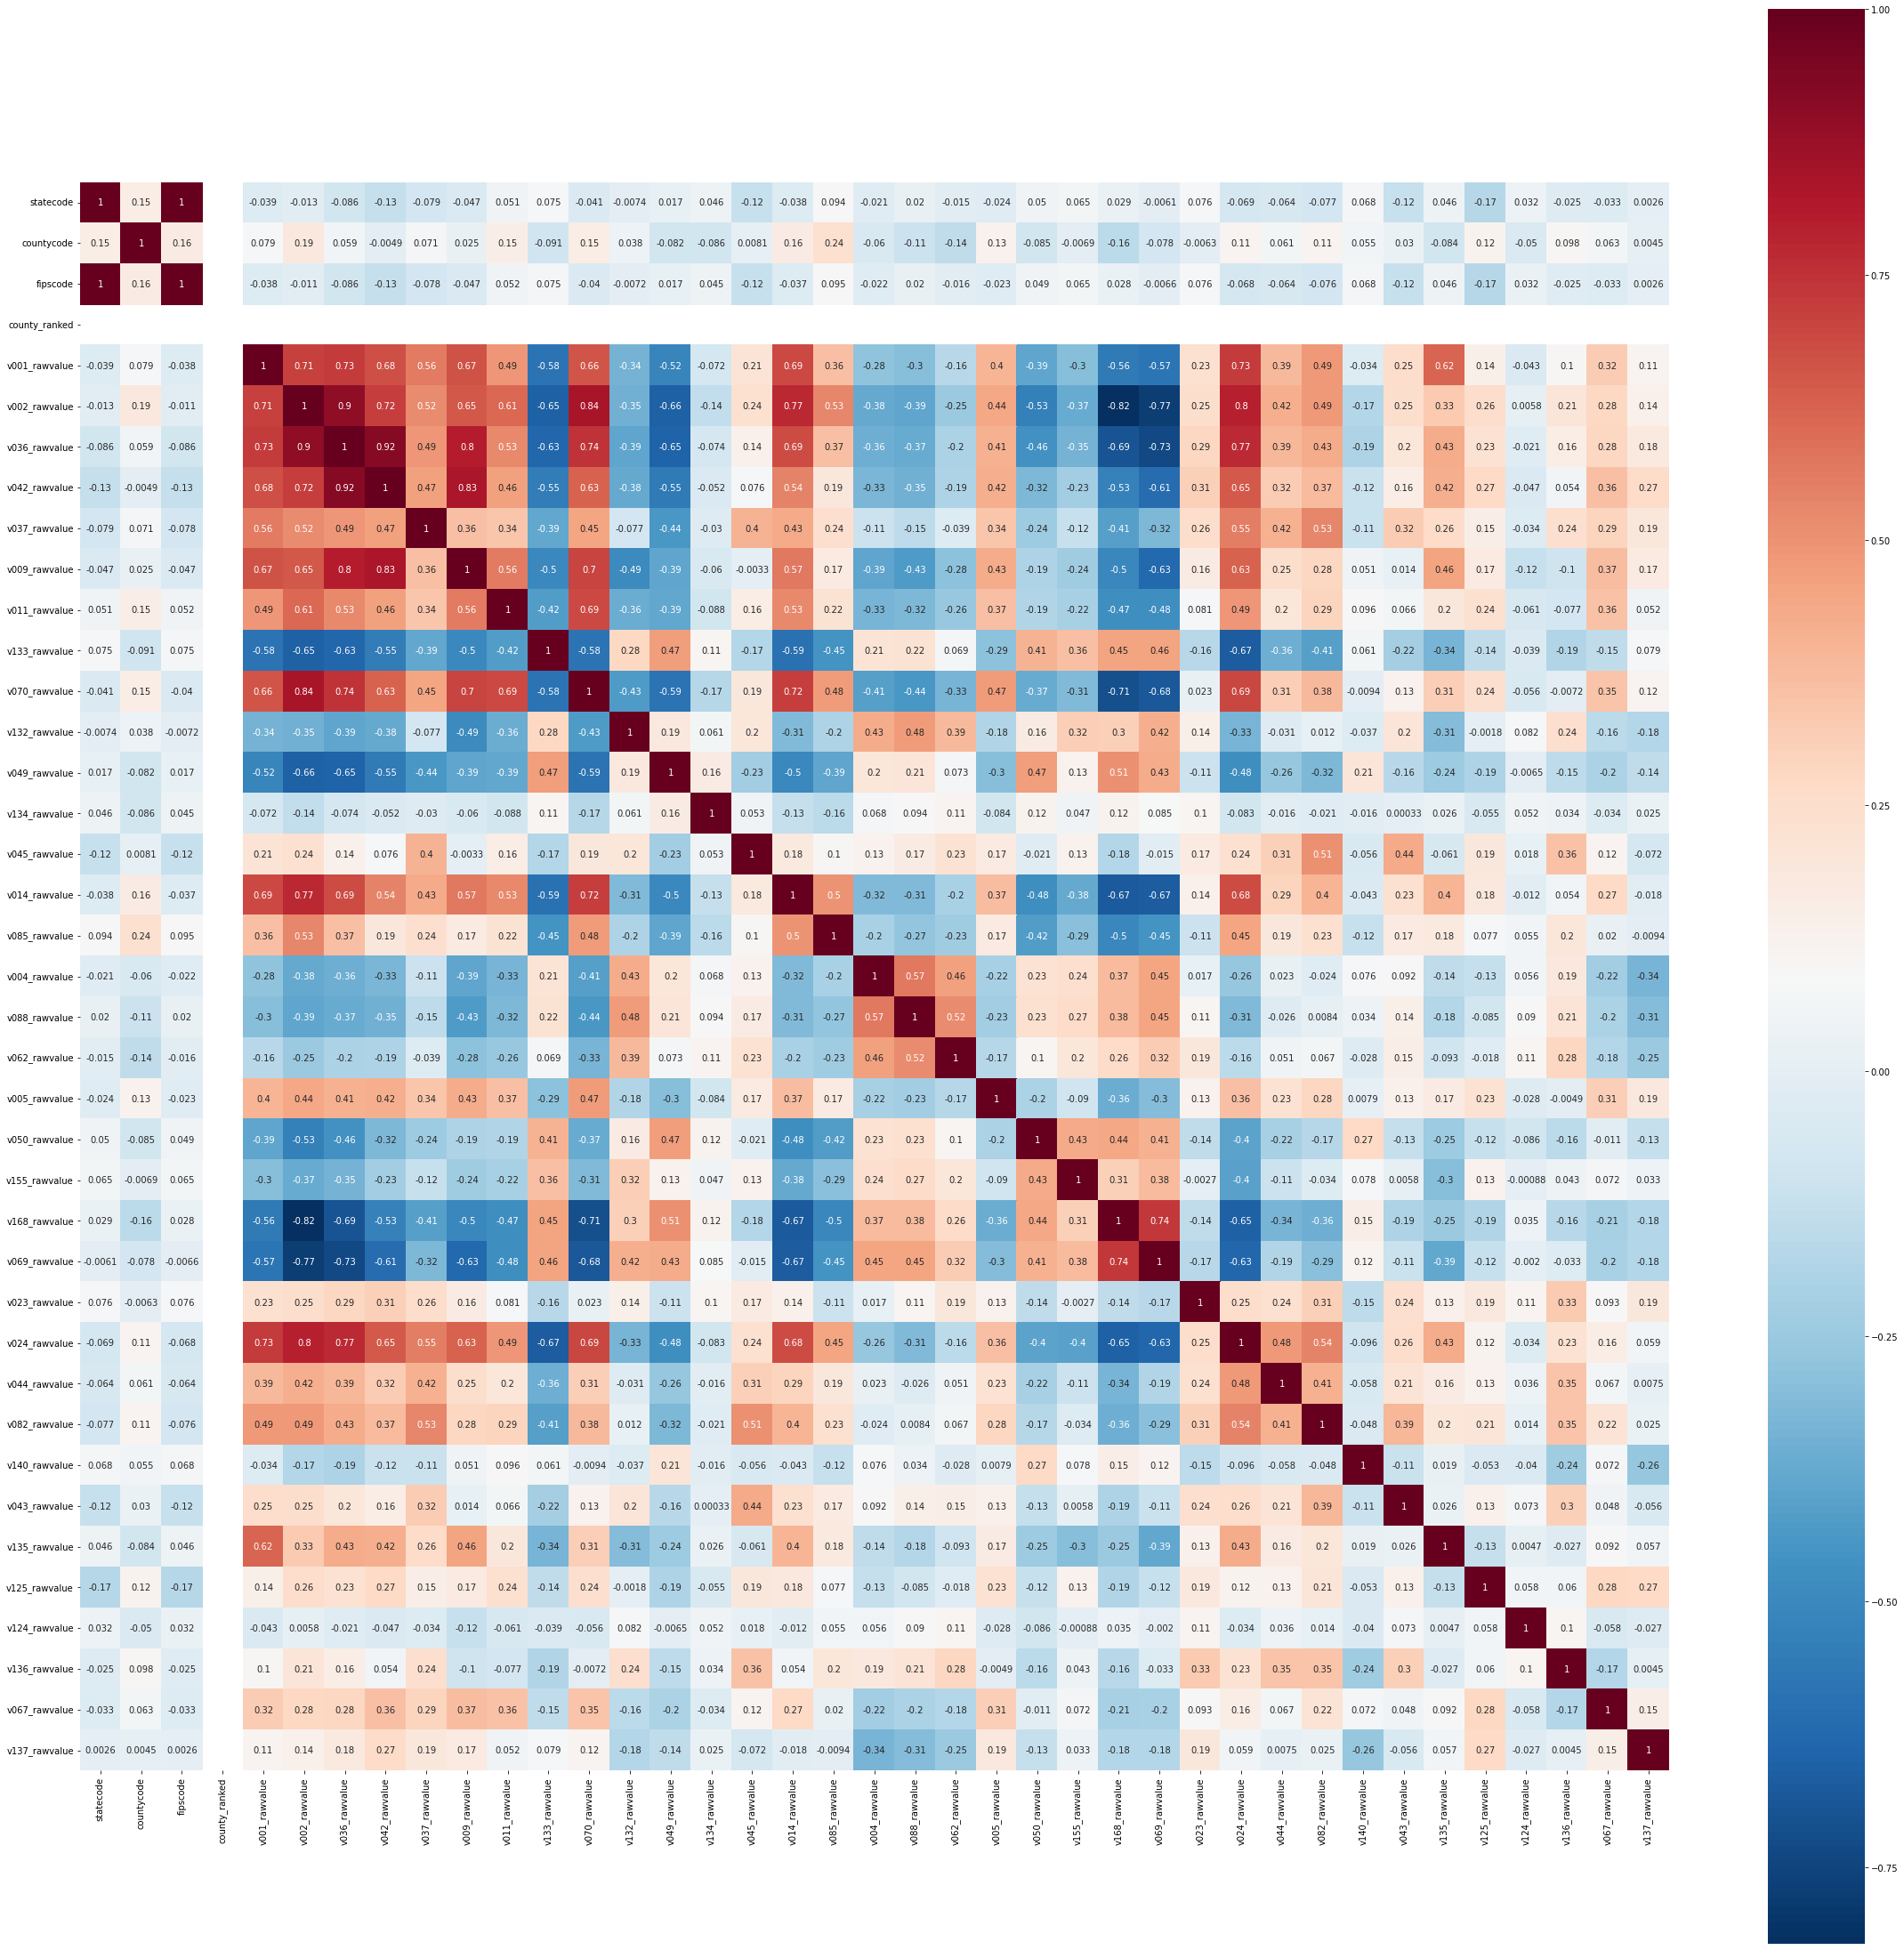

In [123]:
#5b.correlation map
corr = df_nonull.corr()
plt.figure(figsize=(40,40))
sns.heatmap(corr, square=True, annot=True,cmap="RdBu_r")
plt.show()

According to information above, it shows that premature death(v001) has strong correlation(corr > 0.7) with Poor or fair health (v002), Poor physical health days (v036), and Children in poverty (v024).  
There are some features are negligible correlation(corr < 0.5 or > -0.5), such as Adult obesity (v011), Access to exercise opportunities (v132), Alcohol-impaired driving deaths (v134),etc.

In [106]:
#Step6. Select Important Features, corr >=0.5
target_corr = corr['v001_rawvalue']
important_features = target_corr[abs(target_corr) >= 0.5].keys() 
df_important = df_nonull[important_features]
print(important_features)

Index(['v001_rawvalue', 'v002_rawvalue', 'v036_rawvalue', 'v042_rawvalue',
       'v037_rawvalue', 'v009_rawvalue', 'v133_rawvalue', 'v070_rawvalue',
       'v049_rawvalue', 'v014_rawvalue', 'v168_rawvalue', 'v069_rawvalue',
       'v024_rawvalue', 'v135_rawvalue'],
      dtype='object')

In [107]:
#Step 7.Normalization

(2849, 14)


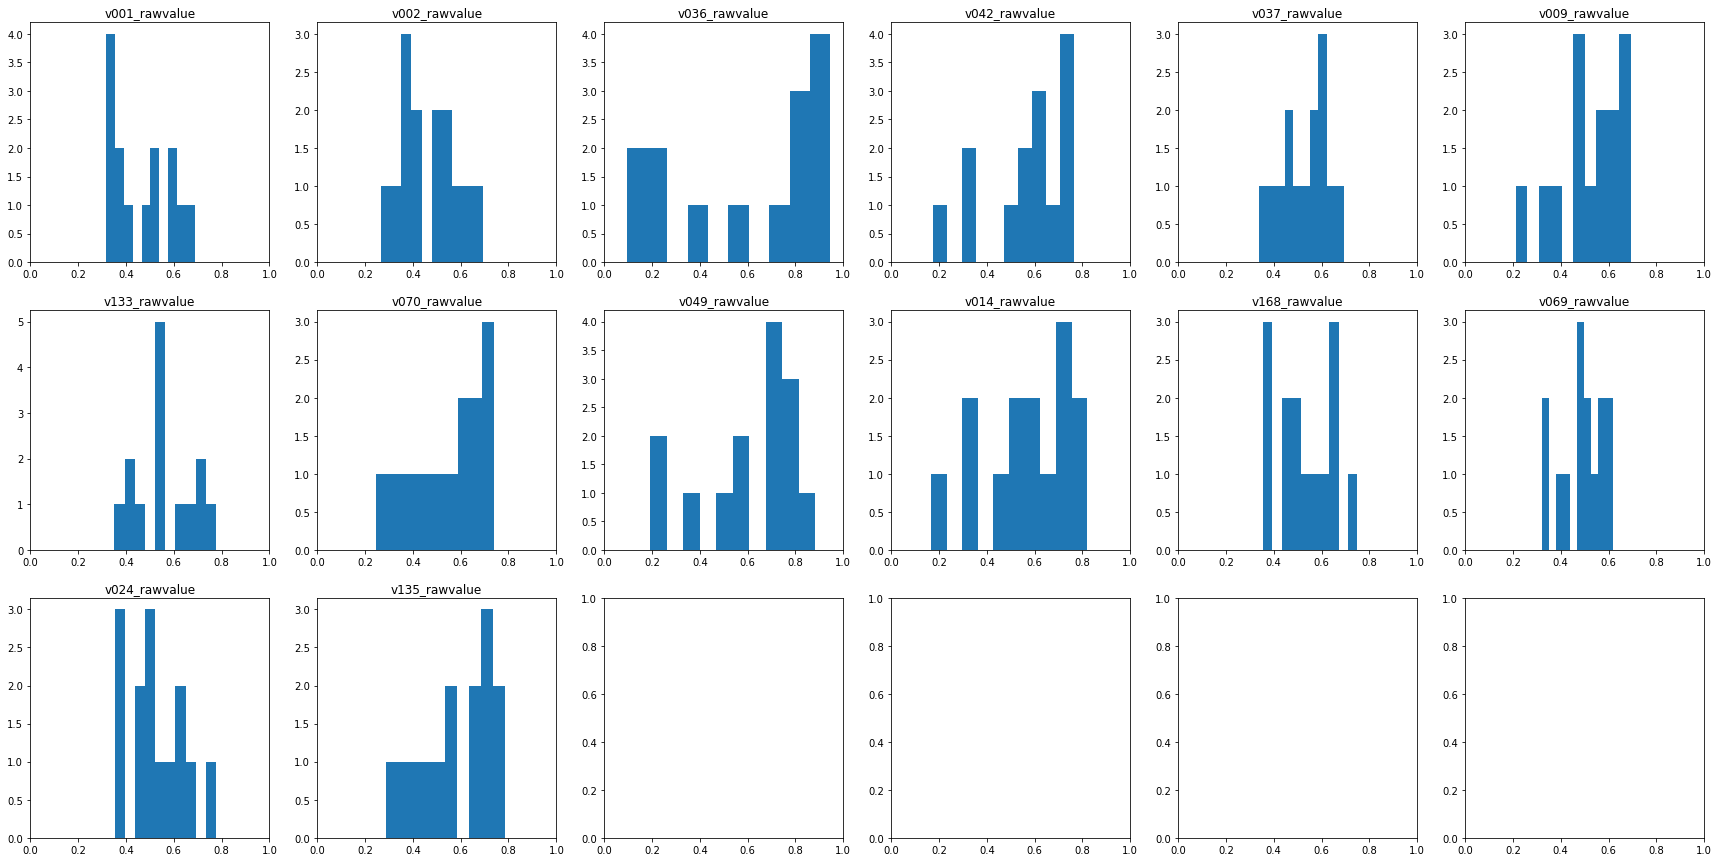

In [108]:
from mpl_toolkits.mplot3d.axes3d import Axes
from sklearn.preprocessing import MinMaxScaler
# Create a standardizer 
scaler = MinMaxScaler(feature_range=(0, 1))

# Select data 
X = df_important

# Transform the data 
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)

# Plot 
fig, axes = plt.subplots(ncols=6, nrows=3, figsize=(30, 15))
for i, feature in enumerate(important_features):
  ax = axes[i//6, i%6]
  # Plot the histogram 
  ax.hist(X_scaled[i, :],bins=10)
  ax.set_title(f'{feature}')
  ax.set_xlim(0, 1)
plt.show()

#### 2)  Are there any noteworthy groupings of counties that have similar health outcomes and behaviors? 
#### You should use an unsupervised learning technique like clustering and show how you decided on the number of clusters. (5 points) 

2) Answer:  
a. Development of clustering model:  

In [109]:
# Filter out the features in the group of "health outcomes" and "health behaviors"
selected_measures = ['v001_rawvalue','v002_rawvalue','v036_rawvalue','v042_rawvalue','v037_rawvalue','v009_rawvalue','v011_rawvalue','v133_rawvalue','v070_rawvalue',
                    'v132_rawvalue','v049_rawvalue','v014_rawvalue']

# make sure selected measures are in the important features
measure_idx = []
X_c_labels = []
for measure in selected_measures:
  if measure in important_features:
    # find the index 
    id = list(important_features).index(measure)
    X_c_labels.append(measure)
    measure_idx.append(id)
  else:
    print(f'{measure} not in important features!')

# Matrix to be clustered
X_c = X_scaled[:, measure_idx]
print(X_c.shape)

v011_rawvalue not in important features!
v132_rawvalue not in important features!
(2849, 10)


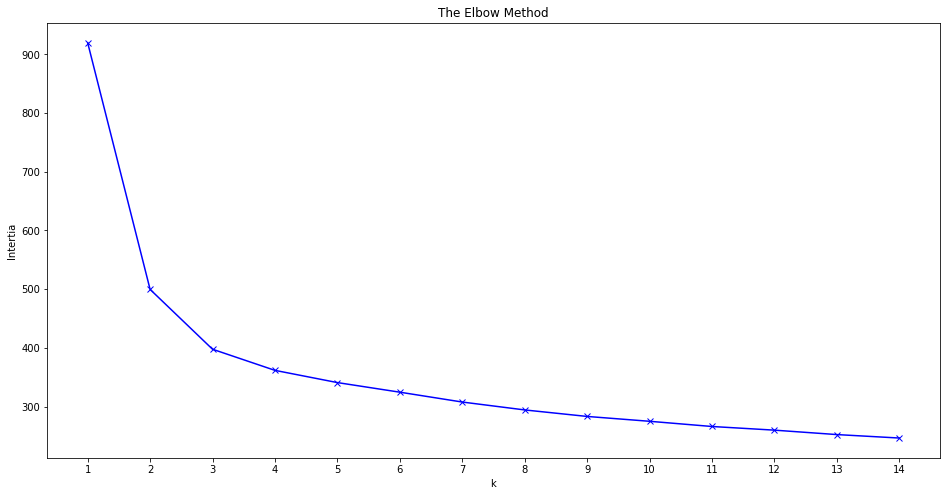

In [110]:
#Run K-Means and draw the elbow graph to select the optimal k
from sklearn.cluster import KMeans
inter = []
r = range(1,15)
for k in r: 
  kmeansModel = KMeans(n_clusters= k, random_state=46)
  clusters_pred = kmeansModel.fit_predict(X_c)
  inter.append(kmeansModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(r, inter, 'bx-')
plt.xlabel('k')
plt.ylabel('Intertia')
plt.xticks(r)
plt.title('The Elbow Method')
plt.show()

b. Determination of number of clusters:  
Based on the result of the elbow graph, I determine k = 3 as number of clusters.

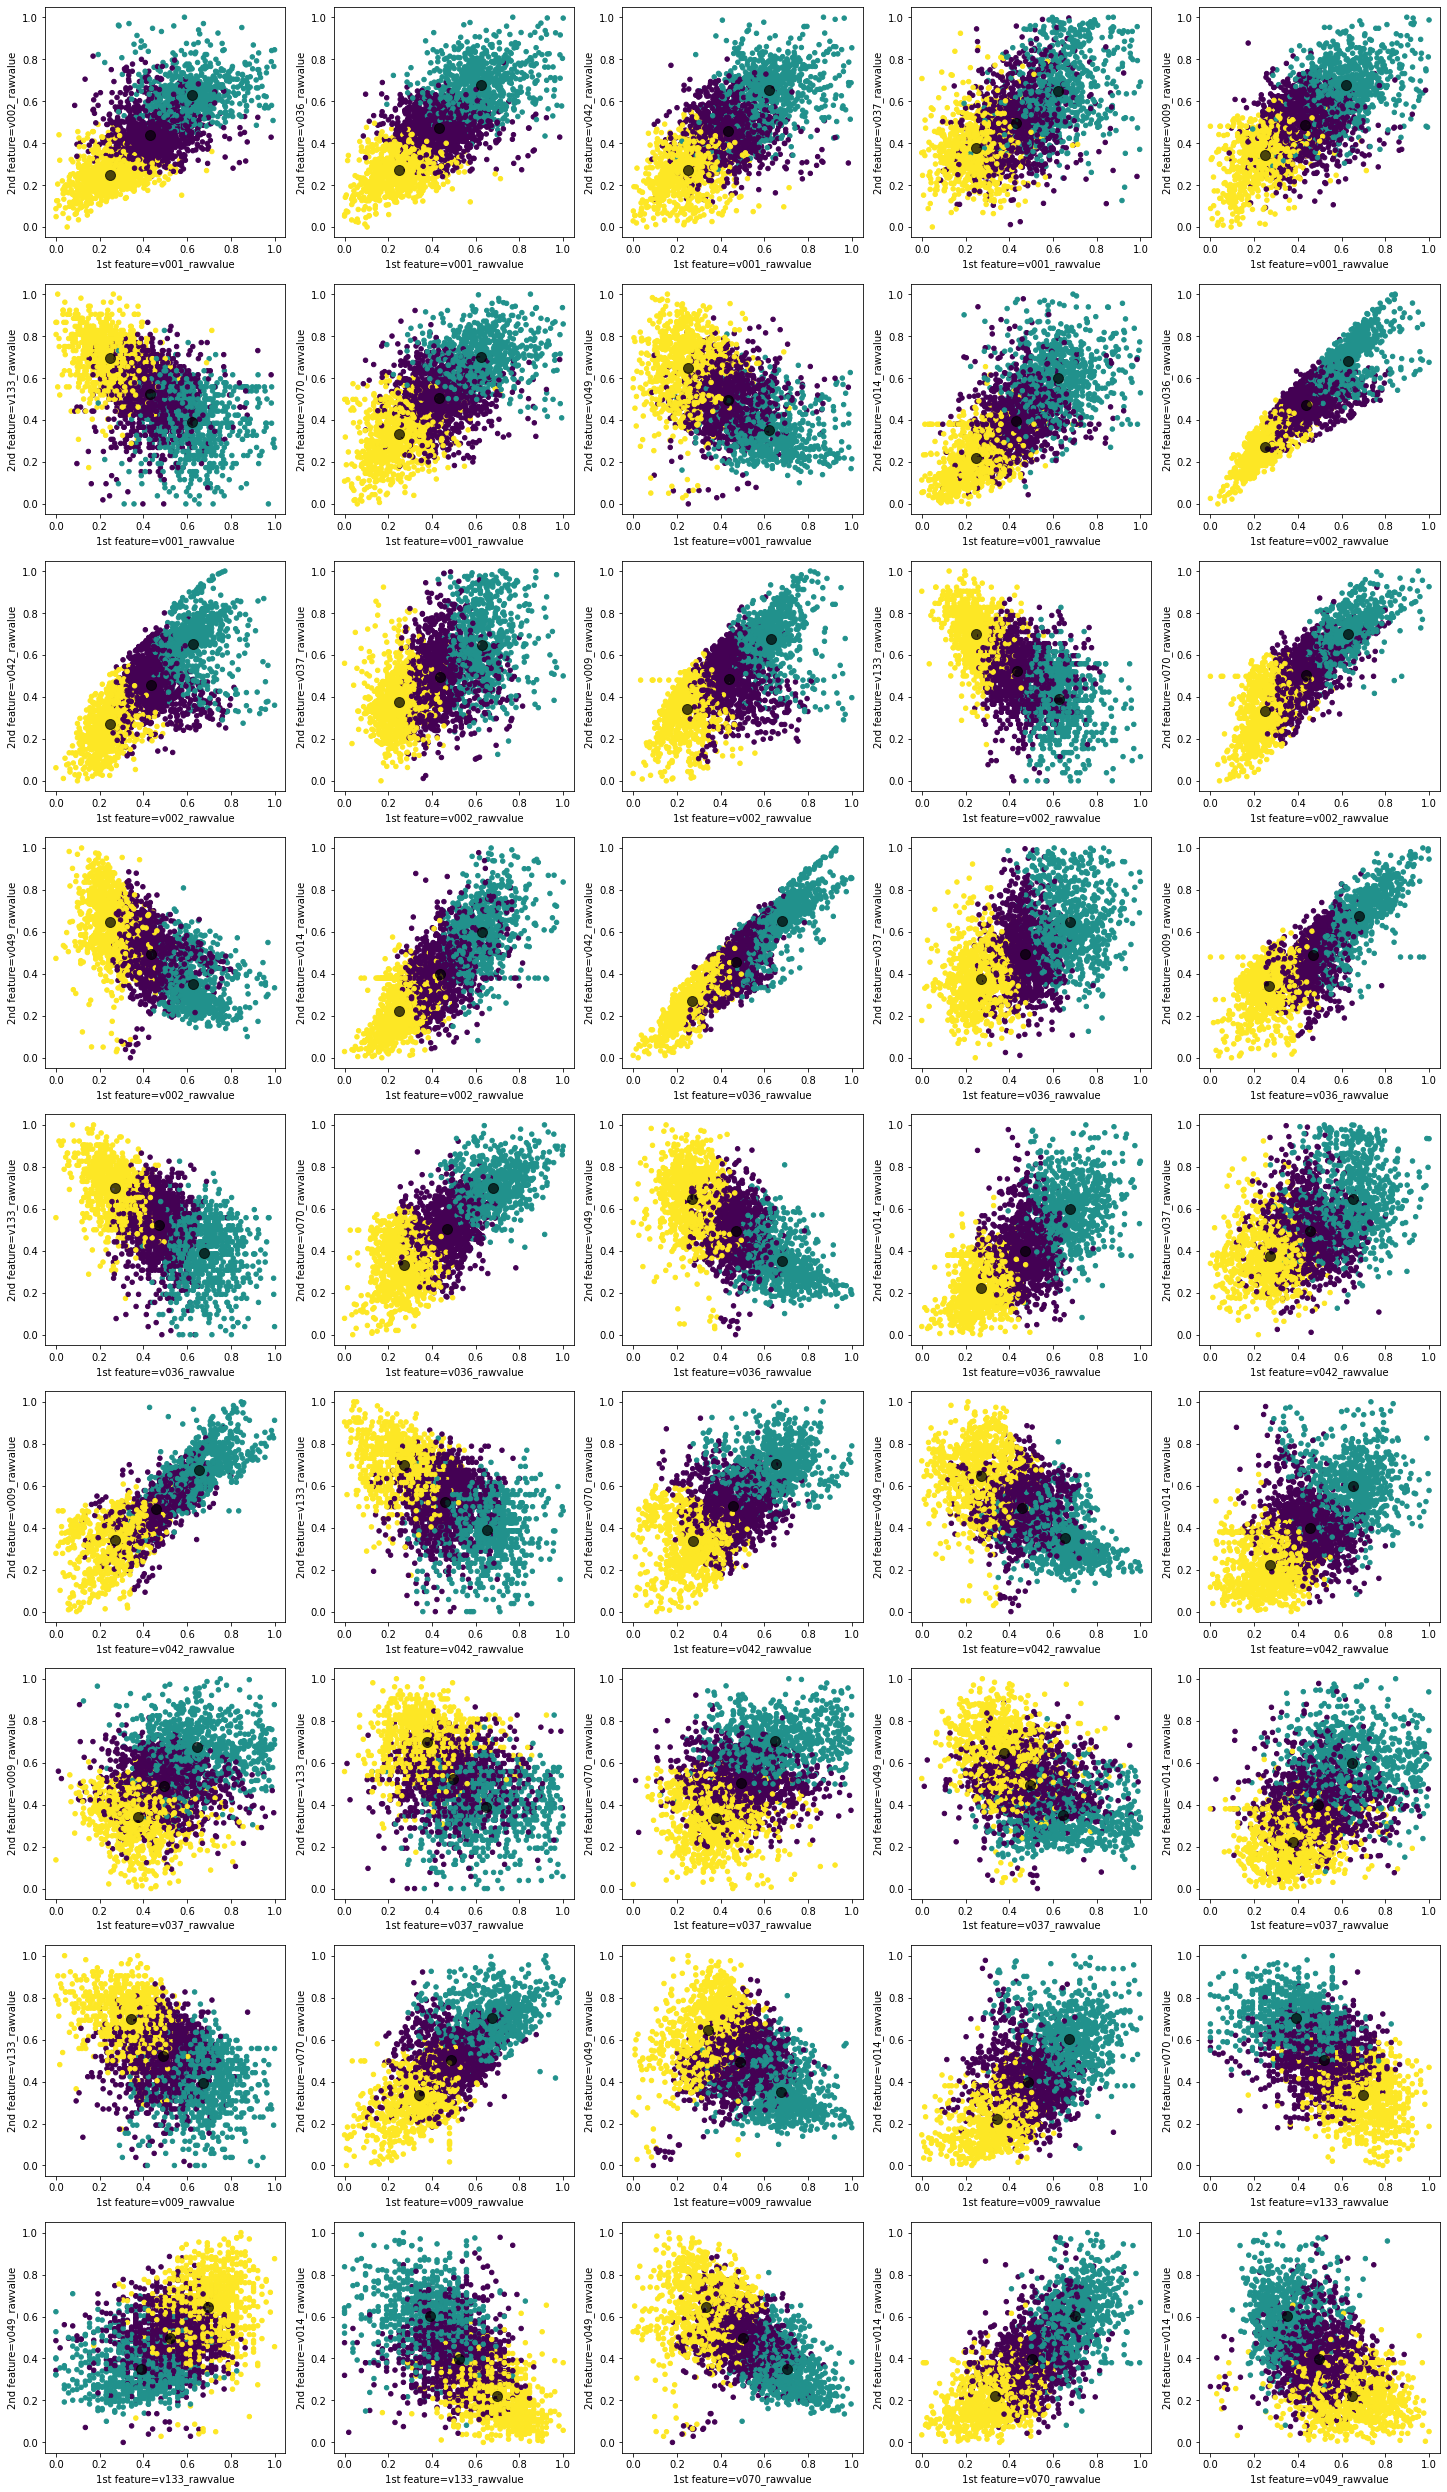

In [111]:
# Are there any noteworthy groupings of counties? 
# According to the elbow and silhouette score, choose k = 3
k = 3
kmeansModel = KMeans(n_clusters= k, random_state=46)
clusters_pred= kmeansModel.fit_predict(X_c)
df_important['cluster'] = clusters_pred
#Plot the clustering result with features
N = 10
id_figure = 0 
ncols = 5
nrows = 9
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols, 5*nrows))
for i in range(0, N):
  for j in range(i+1, N):
    ax = axes[id_figure//ncols, id_figure%ncols]
    ax.scatter(X_c[:, i], X_c[:, j], c=df_important['cluster'], s=20, cmap='viridis')
    centers = kmeansModel.cluster_centers_
    ax.scatter(centers[:, i], centers[:, j], c='black', s=100, alpha=0.7);
    ax.set_xlabel(f"1st feature={X_c_labels[i]}")
    ax.set_ylabel(f"2nd feature={X_c_labels[j]}")
    id_figure += 1
plt.show()  

Based on the graphs, the Premature death (v001) versus the Poor or fair health (v002) clustering has more clear boundaries. It indicates that both health outcomes are highly related. Besides, the Poor physical health days (V036) feature versus Physical inactivity (v070) shows similar pattern. It indicate that physical inactivity might lead to more poor physical health days. 

#### 3)  What are the five most important factors predicting premature death as shown by this data? 
#### In this data set, premature death is defined as the number of years of potential life lost before age 75 per 100,000 population. Develop two models (using different supervised learning approaches) to answer this question. (5 points) 

3) Answer:  
a. Development of first supervised learning model predicting premature death:  

b. Development of second supervised learning model predicting premature death:  

c. List of 5 most important factors influencing premature death, based on two developed models:  


In [112]:
# Prepare data 
from sklearn.model_selection import train_test_split

# Define inputs and targets
# target: premature death 
y = df_important['v001_rawvalue']
X = df_important.iloc[: , 5:]
print(f'target shape: {y.shape}')
print(f'features shape: {X.shape}')


# #split data into train and test group
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

target shape: (2849,)
features shape: (2849, 10)


In [113]:
# Model 1. Linear Regression
from sklearn.linear_model import LinearRegression
# # Linear Regression model
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

inter = model_linear.intercept_
coef = model_linear.coef_
print('Interception : ', inter)
print('Coeficient : ', coef)

Interception :  2726.6023963270145
Coeficient :  [11079.17318293   -57.72350866  2963.77977247 -8732.92532729
    37.42256091 -1970.28793979  1947.83609545  8548.9682513
    34.65185016  -126.13628095]


([<matplotlib.axis.XTick at 0x7fd99ee3d990>,
 [Text(0, 0, 'v037_rawvalue'),
  Text(0, 0, 'v009_rawvalue'),
  Text(0, 0, 'v133_rawvalue'),
  Text(0, 0, 'v070_rawvalue'),
  Text(0, 0, 'v049_rawvalue'),
  Text(0, 0, 'v014_rawvalue'),
  Text(0, 0, 'v168_rawvalue'),
  Text(0, 0, 'v069_rawvalue'),
  Text(0, 0, 'v024_rawvalue'),
  Text(0, 0, 'v135_rawvalue')])

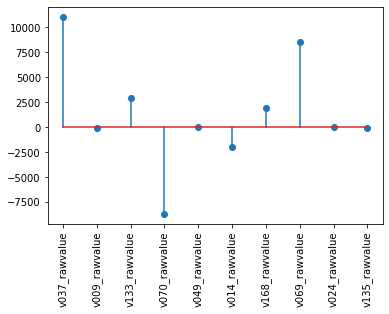

In [114]:
plt.stem(range(len(coef)), coef)
plt.xticks(range(len(coef)), df_important.keys()[4:], rotation=90)
plt.show()

The five most important factors predicting premature death of the Linear Regression model is Low birthweight (v037_rawvalue), Food environment index (v133_rawvalue), Physical inactivity (v070_rawvalue), Teen births (v014_rawvalue) , and Some college (v069_rawvalue). 

In [115]:
# Model 2: Gradient Boosting 
from sklearn import ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

model_gb = ensemble.GradientBoostingRegressor(**params)
model_gb.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

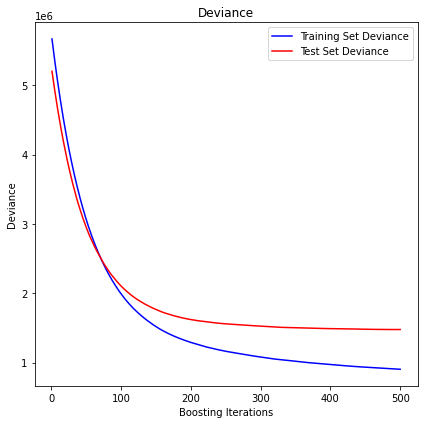

In [116]:
#check iteration deviance
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(model_gb.staged_predict(X_test)):
    test_score[i] = model_gb.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model_gb.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

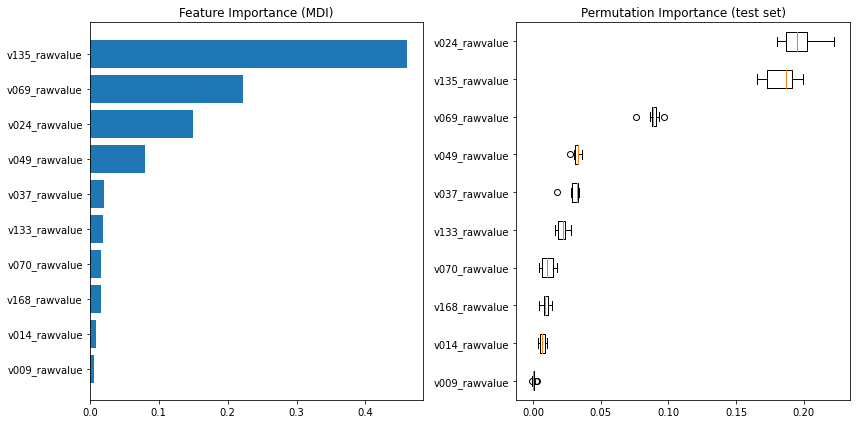

In [117]:
#important features
#reference:https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py
feature_importance = model_gb.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_important.keys()[4:])[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    model_gb, X_test, y_test, n_repeats=10, random_state=0, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df_important.keys()[4:])[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

The five most important factors predicting premature death of the Gradient Boosting model is Injury deaths (v135_rawvalue), Some college (v069_rawvalue), Children in poverty (v024_rawvalue), Excessive drinking (v049_rawvalue) , and Low birthweight (v037_rawvalue). 

#### 4)  Which of the two models do you believe is more accurate and how can you tell? 
#### Where would you focus public health efforts to reduce premature deaths in Allegheny County? (5 points) 

4) Answer:  
a. Evaluating accuracy of the two supervised learning models:  

In [118]:
# Using cross validation
from sklearn.model_selection import cross_validate
 
# Cross-validation
scoring = "neg_mean_squared_error"
linear_scores = cross_validate(model_linear, X_train, y_train, scoring=scoring, return_estimator=True, cv=5)
gb_scores = cross_validate(model_gb, X_train, y_train, scoring=scoring, return_estimator=True, cv=5)
 
# Which one is better? Linear and polynomial
print("Linear regression negative mean_squared_error:", linear_scores["test_score"].mean())
print("GB negative mean_squared_error:", gb_scores["test_score"].mean())
print("Difference:", linear_scores["test_score"].mean() - gb_scores["test_score"].mean())
 

Linear regression negative mean_squared_error: -1531257.0976174697
GB negative mean_squared_error: -1424964.0605615708
Difference: -106293.03705589892


In [119]:
# Testing 
# Accuracy of two models
score_linear = model_linear.score(X_test, y_test)
score_gb = model_gb.score(X_test, y_test)

# Scores
print('Linear Model Score: ', score_linear)
print('GB Model Score: ', score_gb)

# Mean squared error (MSE)
mse = mean_squared_error(y_test, model_linear.predict(X_test))
print("The mean squared error (MSE) on Linear Model test set: {:.4f}".format(mse))

mse = mean_squared_error(y_test, model_gb.predict(X_test))
print("The mean squared error (MSE) on GB Model test set: {:.4f}".format(mse))

Linear Model Score:  0.7095282251670338
GB Model Score:  0.7202867030431562
The mean squared error (MSE) on Linear Model test set: 1532750.2774
The mean squared error (MSE) on GB Model test set: 1475980.3555


Gradient Boosting model is more accurate because it has less mean squared error on training data and higher score(accuracy) on testing data.

b. Recommendations for reducing premature death in Allegheny County:  

Based on the feature_importance analysis of the Gradient Boosting model, the Allegheny County can increase iCU facilities and improve process to lower down the rate of injury death(V135). It should also create some program to support poor children and avoid premature death caused by hunger and lack of resources. 